# Reading Distributions (Tutorial)

We make available statistics of $\kappa, \gamma_{c}, \text{ and } \gamma_{s}$ distributions as a function of source redshift. These distributions can be used as priors for updated cluster lens models. In this notebook, we explain how to read and access our distributions. 

**Requirements:**

    1. `pandas`: package
    2. `ast`: package
    3. `distribution_stats.csv`: distribution statistics

In [1]:
# Importing Packages 

import numpy as np
from scipy.stats import * 
import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval as le

plt.rcParams.update({"font.size":12, "text.usetex": True, "font.family": "Times New Roman"});

The first five lines of the `csv` file are comments:

> \# [0] Redshifts: z = [1, 1.2, 1.4, ..., 5.4] <br>
> \# [1] Shear (gamma_c, gamma_s) info for Abell 2744 <br>
> \# [2] Shear (gamma_c, gamma_s) info for MACS 0416 <br>
> \# [3] Kappa info for Abell 2744 <br>
> \# [4] Kappa info for macs 0416 <br>

Followed by these comments are tab-separated dictionaries that contain the information listed in the comments. We import the file as follows:

In [2]:
file = pd.read_csv("distribution_stats.csv", delimiter = "\t", comment = "#", header = None)

There are four dictionaries in the files, whose content is described by the comments (the first comment is just a general information about our calculations) mentioned above. We access each dictionary as follows:

In [3]:
abell_2744_gamma = le(file[0][0])
macs_0416_gamma = le(file[1][0])
abell_2744_kappa = le(file[2][0])
macs_0416_kappa = le(file[3][0])

Here is an example of what one of the dictionaries looks like:

In [4]:
abell_2744_kappa

{'info': 'Statistics for kappa (Abell 2744 field). Kurtosis uses the Fisher definition (0 for normal)',
 'mean': [-0.0006637647844656852,
  0.0001806006206647571,
  3.77142513558435e-05,
  -7.896749950485105e-05,
  -0.0016270999300132588,
  0.0007984676814719121,
  0.0008491303628497349,
  0.00022866886952563865,
  0.001226678854397424,
  -0.0011991460455180768,
  -0.0015326247130717867,
  0.00013563504486020187,
  0.0009845207600923831,
  0.0006285565361500347,
  -0.0008676246743964393,
  0.0003183668026000224,
  0.0012828729684045245,
  0.0007556434414709278,
  -0.0012025434996872644,
  0.00048339057365431144,
  -0.000900332670560378,
  -0.0009609966860322082,
  -0.0002963809110577941],
 'stdev': [0.05607060476735972,
  0.07113166604882332,
  0.07891218406330959,
  0.08521448132477398,
  0.09082923638558557,
  0.09373560759323965,
  0.09727937082255413,
  0.10056356009027495,
  0.10332811328449061,
  0.10174381132218444,
  0.10340774955941726,
  0.10660085444242662,
  0.1084751499258

# Example 1

Now, we will show some example calculations that can be done using the statistics in the dictionaries. We will examine how well the skew normal distributions fit the $\kappa$ curves for Abell 2744. We do this analysis for redshifts $z = 1, 1.4, 5.4$. 

In [5]:
# First, we need to import our actual kappa distributions
kappa_2744 = np.load("kappa_a2744A.npy", allow_pickle = True);

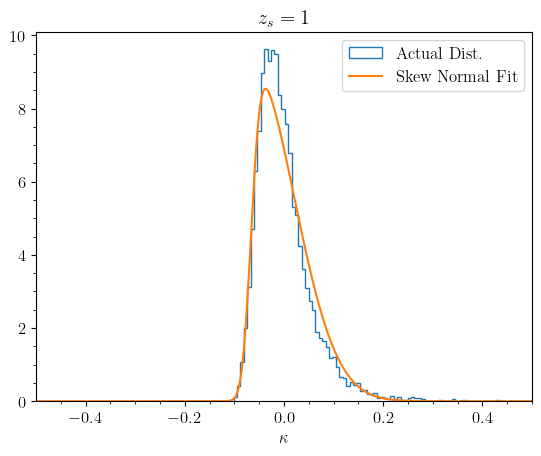

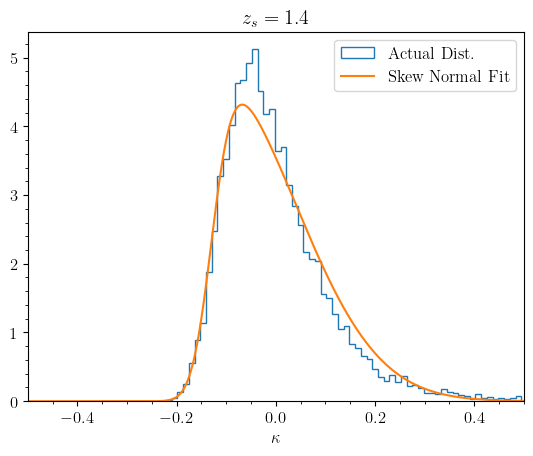

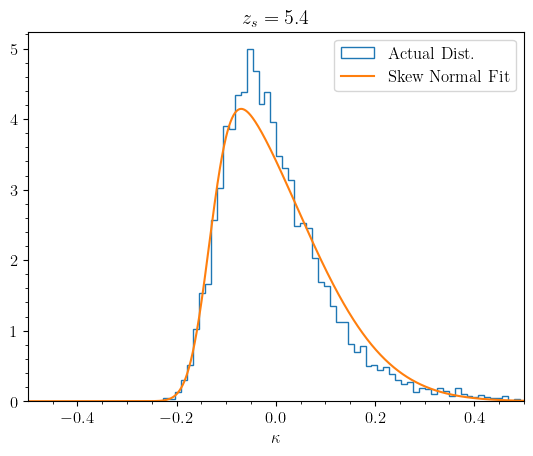

In [6]:
# Comparing the histograms of our actual kappa distributions with our fitted skew normal curves 
redshifts = [1,1.4,5.4]
for i, j in enumerate([0, 14, -1]):
    plt.hist(kappa_2744[j], bins = 100, density = True, histtype = "step", label = 'Actual Dist.')
    sk = abell_2744_kappa["SkewNormParam"][j]
    xx = np.linspace(-0.5, 0.5, 10**3)
    plt.plot(xx, skewnorm.pdf(xx, a = sk[0], loc = sk[1], scale = sk[2]), label = 'Skew Normal Fit')
    plt.xlim([-0.5, 0.5])
    plt.legend();
    plt.minorticks_on();
    plt.xlabel('$\kappa$')
    plt.title(f"$z_{{s}} = {redshifts[i]}$")
    plt.show()

# Example 2 

Let us do the same type of analysis with $\gamma_{c}$. Opening the skewness values for $\gamma_{c}$, we know that the distribution is roughly normal. So, we can fit a normal curve to the distributions using the mean and standard deviations. We do it for the same redshifts we used above. 

In [7]:
# First, we need to import our actual gamma_c distributions
gammac_2744 = np.load("gc_a2744A.npy", allow_pickle = True);

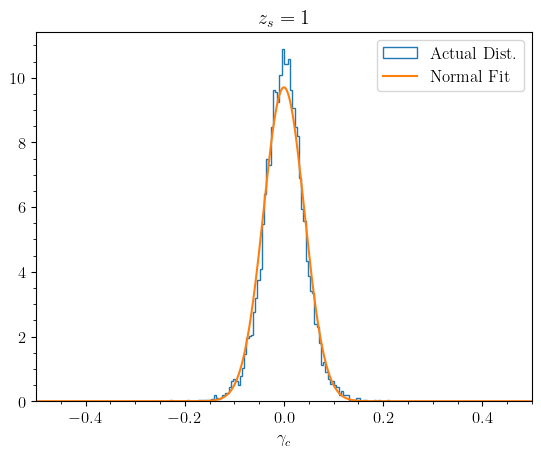

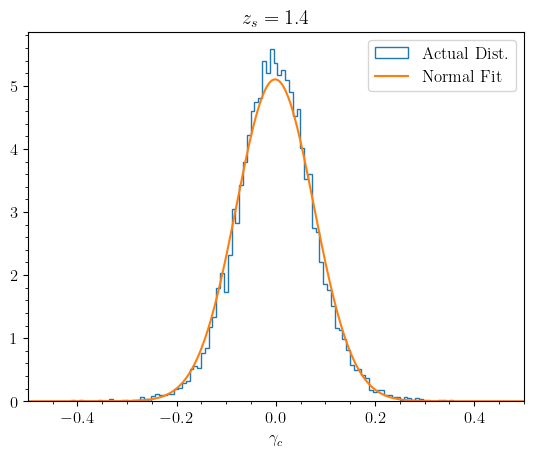

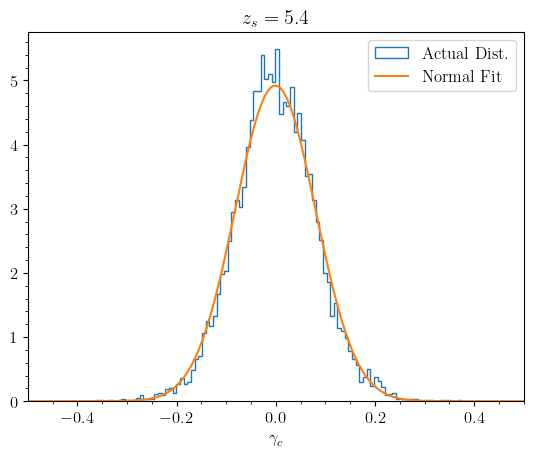

In [8]:
# Comparing the histograms of our actual kappa distributions with our fitted skew normal curves 
redshifts = [1,1.4,5.4]
for i, j in enumerate([0, 14, -1]):
    plt.hist(gammac_2744[j], bins = 100, density = True, histtype = "step", label = 'Actual Dist.')
    xx = np.linspace(-0.5, 0.5, 10**3)
    info = (abell_2744_gamma["gamma_c"]["mean"][j], abell_2744_gamma["gamma_c"]["stdev"][j])
    plt.plot(xx, norm.pdf(xx, loc = info[0], scale = info[1]), label = "Normal Fit")
    plt.xlim([-0.5, 0.5])
    plt.legend();
    plt.minorticks_on();
    plt.xlabel('$\gamma_{c}$')
    plt.title(f"$z_{{s}} = {redshifts[i]}$")
    plt.show()